<a href="https://colab.research.google.com/github/EvidenceN/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Evidence%20N.%20Answers_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [55]:
# TODO - your code!

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chisquare 

### Loading the assignment data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

print(df.shape)

# replacing the unknown values with NaN, and replacing yes and no with 0's and 1's
# because we can't graph strings. we can only graph numbers. 
df = df.replace({'n':0, 'y':1})

# forward fill and backwards fill so that i can replace all NaN with numerical data
# iF I don't replace nan with numerical data, i will get nan as answer when i 
# try to generate a confidence interval. 
df = df.replace({'?':np.NaN})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
df.head()
df.tail()

--2019-10-08 23:58:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.19’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-10-08 23:58:40 (286 KB/s) - ‘house-votes-84.data.19’ saved [18171/18171]

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
434,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [0]:
df.isnull().sum()

In [0]:
from scipy import stats

# Formula to calculate confidence interval

def confidence_interval(data, confidence=0.95):
  ''' Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)'''

  data=np.array(data)
  mean=np.mean(data)
  n=len(data)
  stderr=stats.sem(data)
  margin=stderr * stats.t.ppf((1+confidence) / 2.0, n-1)
  return (mean, mean-margin, mean+margin)

# Explaination of individual parts. 
# Reference for stats.t.ppf
# stats.t.ppf(# probability cutoff, # degrees of freedom)
# 95% confidence level -> .025
# 1 - confidence_level == .05 / 2 -> .025
# confidence_level = .95
# dof = 42-1
# stats.t.ppf((1 + confidence_level) / 2, dof)


In [58]:
stderr=stats.sem(df['water-project'])
stderr
margin=stderr * stats.t.ppf((1.95) / 2.0, len(df['water-project'])-1)
margin


0.04715112121808511

In [77]:
# Confidence interval for "budget" data for both republicans and democrats

'''This data shows that approximately 60% of people in congress would approve
 the budget bill with a 95% confidence interval of +/- "9%" 

This means that 95% of the time, [51-69%] of people in congress will vote yes 
for this bill'''


confidence_interval(df['budget'])

(0.6, 0.5537808807430822, 0.6462191192569178)

In [0]:
# splitting the data in two into democrats and republican data sets. 
rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

In [76]:
# Confidence interval for "budget" data for democrats

# Data Interpretation
'''This data shows that approximately 88% of democrats would approve the 
budget bill with a 95% confidence interval of +/- "8%" 

This means that 95% of the time, [80-96%] of democrats will vote yes for 
this bill'''


confidence_interval(dem['budget'])

(0.8838951310861424, 0.845221642322039, 0.9225686198502457)

In [75]:
# Confidence interval for "budget" data for republicans 

# Data Interpretation
'''This data shows that approximately 15% of republicans would approve the 
budget bill with a 95% confidence interval of +/- "11%" 

This means that 95% of the time, [4-26%] of republicans will vote yes for 
this bill'''


confidence_interval(rep['budget'],confidence=0.95)

(0.1488095238095238, 0.09443727913592906, 0.20318176848311856)

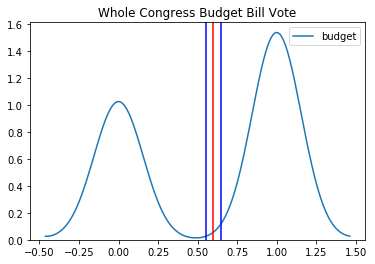

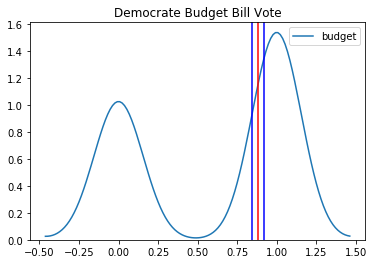

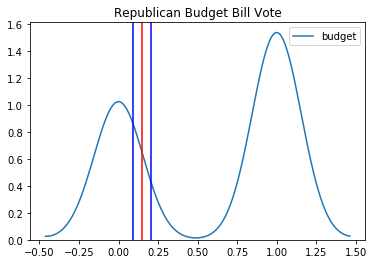

In [91]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.patch.set(facecolor='white')

# Plotting the mean and confidence interval of the whole congressional
# vote for the budget bill. so, plotting budget data set. 

sns.kdeplot(df['budget'])
CI = confidence_interval(df['budget'])
plt.axvline(x=CI[1], color='blue') # one here means index 1 of the confidence 
# interval result.  So like saying confidence_interval[1] 
# which means give me the result located at index 1 of the list of results
# from the confidence interval. The result located in the index 1 represents
# the lower bound of the confidence interval. index 2 below is upper bound of
# confidence interval, index 0 below is the mean of the data set. 
plt.axvline(x=CI[2], color='blue')
plt.axvline(x=CI[0], color='red')
plt.title('Whole Congress Budget Bill Vote');
plt.show()

# Plotting the mean and confidence interval of the democratic
# vote for the budget bill. so, plotting budget data set. 

fig, ax = plt.subplots()
fig.patch.set(facecolor='white')
sns.kdeplot(df['budget'])
CI = confidence_interval(dem['budget'])
plt.axvline(x=CI[1], color='blue') # one here means index 1 of the confidence 
# interval result.  So like saying confidence_interval[1] 
# which means give me the result located at index 1 of the list of results
# from the confidence interval. The result located in the index 1 represents
# the lower bound of the confidence interval. index 2 below is upper bound of
# confidence interval, index 0 below is the mean of the data set. 
plt.axvline(x=CI[2], color='blue')
plt.axvline(x=CI[0], color='red')
plt.title('Democrate Budget Bill Vote');

plt.show()

# Plotting the mean and confidence interval of the republican
# vote for the budget bill. so, plotting budget data set. 

fig, ax = plt.subplots()
fig.patch.set(facecolor='white')
sns.kdeplot(df['budget'])
CI = confidence_interval(rep['budget'])
plt.axvline(x=CI[1], color='blue') # one here means index 1 of the confidence 
# interval result.  So like saying confidence_interval[1] 
# which means give me the result located at index 1 of the list of results
# from the confidence interval. The result located in the index 1 represents
# the lower bound of the confidence interval. index 2 below is upper bound of
# confidence interval, index 0 below is the mean of the data set. 
plt.axvline(x=CI[2], color='blue')
plt.axvline(x=CI[0], color='red')
plt.title('Republican Budget Bill Vote');

plt.show()

In [0]:
'''This data shows us that the democrats are more likely to vote for the budget
bill more their republican counterpart. Also we can infer that this bill passed
because overall congress vote in favor of the bill is 60%'''

In [0]:
'''Take a dataset that we have used in the past in class that has categorical 
variables. Pick two of those categorical variables and run 
a chi-squared tests on that data

By hand using Numpy
In a single line using Scipy'''



In [92]:
# Loading data
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv.zip
import pandas as pd
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

loans = pd.read_csv('LoanStats_2018Q4.csv', header = 1, skipfooter=2, engine='python')
print(loans.shape)
loans.head()

--2019-10-09 01:47:20--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.62M   899KB/s    in 25s     

2019-10-09 01:47:45 (900 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22667400]

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    
(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Indi

In [103]:
# I am going to bin loan amount and annual income
# looking at maximum and minimum values for the data i want to bin
loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,128412.000000,128412.000000,128412.000000,128412.000000,1.284120e+05,0.0,0.0,128175.000000,128412.000000,128412.000000,56216.000000,15450.000000,128412.000000,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,29180.000000,128412.0,1.678200e+04,16782.000000,128412.0,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,123934.000000,1.284120e+05,108138.000000,128412.000000,128412.000000,128412.000000,128375.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,128399.000000,126721.000000,126658.000000,128412.000000,128412.000000,123934.000000,128412.000000,128412.000000,128412.000000,128412.000000,126821.000000,25169.000000,112365.000000,36782.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,125553.0,128412.0,128412.000000,128412.000000,128412.000000,126720.000000,128412.000000,128412.0,1.284120e+05,1.284120e+05,128412.000000,1.284120e+05,1.678200e+04,16782.000000,16782.000000,16782.000000,16524.000000,16782.000000,16782.000000,16782.000000,16782.000000,5154.000000,69.0,69.000000,69.0,69.000000,67.000000,69.000000,69.000000,168.000000,168.000000,168.000000
mean,NaN,NaN,15971.321021,15971.321021,15968.498166,463.253654,8.279733e+04,NaN,NaN,19.933178,0.227837,0.447038,36.880337,86.130162,11.564052,0.121850,1.689800e+04,22.677413,11099.092269,11097.369164,5968.022141,5966.735984,4517.296051,1441.805821,0.620806,8.299461,1.493903,1845.527731,0.017958,46.553461,1.0,1.335516e+05,19.226602,0.0,188.304286,1.467922e+05,0.939507,2.760202,0.689071,1.572665,20.201519,3.627228e+04,68.211757,1.195901,2.540783,6062.072275,54.298812,3.938218e+04,1.114561,1.519928,1.876912,4.382698,13828.378874,15357.302957,50.048701,0.007087,0.967768,123.056925,173.063623,15.431634,8.635400,1.323155,26.013957,40.415233,7.552832,37.817275,0.461553,3.659876,5.414128,4.882129,7.065944,8.288524,8.199210,12.866702,5.386342,11.546717,0.0,0.0,0.059488,2.011642,94.659843,32.900756,0.121733,0.0,1.884852e+05,5.356097e+04,27439.534163,4.682180e+04,3.66428

In [122]:
# binning loan amount and making them categorical
cut_points = [0, 9000, 19000, 29000, 39000, 50000 ]
label_names=['0-9k', '10k-19k', '20k-29k', '30k - 39k', '40k+']
loans['loan_amnt_cat'] = pd.cut(loans['loan_amnt'], cut_points, labels=label_names)

# binning annual income and making them categorical. minimum = 0; max = 9757200

cut_points = [0, 200000, 400000, 600000, 800000, 1000000 ]
label_names=['0-200k', '201k-400k', '401k-600k', '601k-800k', '1M+']
loans['annual_income_cat'] = pd.cut(loans['annual_inc'], cut_points, labels=label_names)
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_categories,annual_income_cat,loan_amnt_cat
0,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,20k-29k,0-200k,20k-29k
1,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,20k-29k,0-200k,20k-29k
2,NaN,NaN,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,2341

In [0]:
loans.describe(exclude='number')

In [117]:
loans['annual_income_cat'].value_counts()

0-200k       124114
201k-400k      3547
401k-600k       314
601k-800k        99
1M+              38
Name: annual_income_cat, dtype: int64

In [120]:
loans['loan_amnt_cat'].value_counts()

10k-19k      49284
0-9k         35123
20k-29k      25251
30k - 39k    13326
40k+          5428
Name: loan_amnt_cat, dtype: int64

In [126]:
# creating a crosstab of my loan amount categories
table = pd.crosstab(loans['loan_amnt_cat'], loans['annual_income_cat'], margins=True)
table

annual_income_cat,0-200k,201k-400k,401k-600k,601k-800k,1M+,All
loan_amnt_cat,,,,,,
0-9k,34780,246,30,9,4,13277
10k-19k,48338,769,48,17,4,49176
20k-29k,24220,867,72,26,8,35069
30k - 39k,12164,997,80,27,9,25193
40k+,4612,668,84,20,13,5397
All,124114,3547,314,99,38,128112


In [146]:
# creating a variable that contains the totals for the rows and columns. 
# when using "iloc", the first number indicates index location
# for example, 5 = 5th index starting at 0, 0:5 = select the first 5 indexes,
# second number is the column location. for example [5, 4]; 4 in this situation
# says to go to 4th column starting from zero. [5, 0:6] means to select the 
# first 6 columns in index 5 starting with zero. 
# .loc locates a value by label. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

row_sums = table.iloc[0:5, 5].values
col_sums = table.iloc[5, 0:5].values
total = table.loc['All', 'All']
print(row_sums)
print(col_sums)
print(total)

[13277 49176 35069 25193  5397]
[124114   3547    314     99     38]
128112


In [148]:
# calculating expected value
expected = []
for i in range(len(row_sums)):
  expected_row= []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected=np.array(expected)
print(expected.shape)
print(expected)


(5, 5)
[[1.28626637e+04 3.67596470e+02 3.25416667e+01 1.02599522e+01
  3.93816348e+00]
 [4.76413612e+04 1.36152173e+03 1.20529412e+02 3.80013114e+01
  1.45863619e+01]
 [3.39745993e+04 9.70945290e+02 8.59534314e+01 2.70999672e+01
  1.04020076e+01]
 [2.44068003e+04 6.97511326e+02 6.17475490e+01 1.94681763e+01
  7.47263332e+00]
 [5.22857545e+03 1.49425183e+02 1.32279412e+01 4.17059292e+00
  1.60083365e+00]]


In [150]:
# calculating observed values

observed = pd.crosstab(loans['loan_amnt_cat'], loans['annual_income_cat']).values
print(observed.shape)
observed

(5, 5)


array([[34780,   246,    30,     9,     4],
       [48338,   769,    48,    17,     4],
       [24220,   867,    72,    26,     8],
       [12164,   997,    80,    27,     9],
       [ 4612,   668,    84,    20,    13]])

In [160]:
# calculating chi-squared using observed and expected value calculated above
chi_squared = ((observed-expected) ** 2/(expected)).sum()
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 4601.298655620182


In [158]:
# calculating degree of freedom
# Degrees of Freedom of a Chi-squared test
#degrees_of_freedom = (num_rows - 1)(num_columns - 1)
# Calculate Degrees of Freedom
# degree of freedom = dof

dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")



Degrees of Freedom: 16


In [161]:
# Finding chi-squared using a scipy function

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 4601.298655620182
P-value: 0.0
Degrees of Freedom: 16
Expected: 
 [[3.39745993e+04 9.70945290e+02 8.59534314e+01 2.70999672e+01
  1.04020076e+01]
 [4.76413612e+04 1.36152173e+03 1.20529412e+02 3.80013114e+01
  1.45863619e+01]
 [2.44068003e+04 6.97511326e+02 6.17475490e+01 1.94681763e+01
  7.47263332e+00]
 [1.28626637e+04 3.67596470e+02 3.25416667e+01 1.02599522e+01
  3.93816348e+00]
 [5.22857545e+03 1.49425183e+02 1.32279412e+01 4.17059292e+00
  1.60083365e+00]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)